In [6]:
from rbm import RBM
from dbn import DeepBeliefNetwork
from autoencoder_rbm import Autoencoder_RBM
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


In [1]:
# Download the data in the working directory
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)

#training_data = {image: mnist.train.images, label: mnist.train.labels}
#validation_data = {image: mnist.validation.images, label: mnist.validation.labels}
#test_data = {image: mnist.test.images, label: mnist.test.labels}
train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
print("The shape of the dataset for training: ", train_dataset.shape, train_labels.shape)
print("The shape of the dataset for validation: ", validation_dataset.shape, validation_labels.shape)
print("The shape of the dataset for test: ", test_dataset.shape, test_labels.shape)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
The shape of the dataset for training:  (55000, 784) (55000, 10)
The shape of the dataset for validation:  (5000, 784) (5000, 10)
The shape of the dataset for test:  (10000, 784) (10000, 10)


In [2]:
dbn_model_1 = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[750, 400, 80],
        rbm_gauss_visible=True,
        finetune_num_epochs=300,
        do_pretrain=False)
accuracy_summary_1, loss_summary_1 = dbn_model_1.fit(train_dataset, train_labels, validation_dataset, validation_labels, test_dataset, test_labels)

Iter 1:  Training: current loss 1.646547 | current accuracy 0.459764 || Validation: current loss 1.639998 | current accuracy 0.461000 || Test: accuracy 0.460700
Iter 2:  Training: current loss 0.698563 | current accuracy 0.810182 || Validation: current loss 0.682786 | current accuracy 0.815600 || Test: accuracy 0.818600
Iter 3:  Training: current loss 0.462896 | current accuracy 0.869745 || Validation: current loss 0.446709 | current accuracy 0.877000 || Test: accuracy 0.872200
Iter 4:  Training: current loss 0.392062 | current accuracy 0.888818 || Validation: current loss 0.379451 | current accuracy 0.895200 || Test: accuracy 0.891800
Iter 5:  Training: current loss 0.348975 | current accuracy 0.899200 || Validation: current loss 0.333851 | current accuracy 0.903200 || Test: accuracy 0.903100
Iter 6:  Training: current loss 0.324370 | current accuracy 0.906509 || Validation: current loss 0.311018 | current accuracy 0.910400 || Test: accuracy 0.908100
Iter 7:  Training: current loss 0.

In [3]:
dbn_model_2 = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[750, 400, 10],
        rbm_gauss_visible=True,
        finetune_num_epochs=300,
        do_pretrain=False)
accuracy_summary_2, loss_summary_2 = dbn_model_2.fit(train_dataset, train_labels, validation_dataset, validation_labels, test_dataset, test_labels)

Iter 1:  Training: current loss 2.250535 | current accuracy 0.157145 || Validation: current loss 2.247811 | current accuracy 0.156000 || Test: accuracy 0.158900
Iter 2:  Training: current loss 1.344508 | current accuracy 0.599127 || Validation: current loss 1.329926 | current accuracy 0.604800 || Test: accuracy 0.607800
Iter 3:  Training: current loss 0.897247 | current accuracy 0.724673 || Validation: current loss 0.877281 | current accuracy 0.734400 || Test: accuracy 0.732800
Iter 4:  Training: current loss 0.691807 | current accuracy 0.813527 || Validation: current loss 0.671465 | current accuracy 0.821400 || Test: accuracy 0.816800
Iter 5:  Training: current loss 0.558356 | current accuracy 0.854491 || Validation: current loss 0.539184 | current accuracy 0.866600 || Test: accuracy 0.859100
Iter 6:  Training: current loss 0.496125 | current accuracy 0.864291 || Validation: current loss 0.477336 | current accuracy 0.872200 || Test: accuracy 0.870700
Iter 7:  Training: current loss 0.

In [4]:
dbn_model_3 = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[750, 400, 5],
        rbm_gauss_visible=True,
        finetune_num_epochs=300,
        do_pretrain=False)
accuracy_summary_3, loss_summary_3 = dbn_model_3.fit(train_dataset, train_labels, validation_dataset, validation_labels, test_dataset, test_labels)

Iter 1:  Training: current loss 2.285773 | current accuracy 0.112345 || Validation: current loss 2.284439 | current accuracy 0.112600 || Test: accuracy 0.113500
Iter 2:  Training: current loss 1.879377 | current accuracy 0.361909 || Validation: current loss 1.875569 | current accuracy 0.371200 || Test: accuracy 0.358300
Iter 3:  Training: current loss 1.360014 | current accuracy 0.565436 || Validation: current loss 1.350348 | current accuracy 0.567800 || Test: accuracy 0.562900
Iter 4:  Training: current loss 1.044182 | current accuracy 0.695309 || Validation: current loss 1.024064 | current accuracy 0.713800 || Test: accuracy 0.699700
Iter 5:  Training: current loss 0.849896 | current accuracy 0.766236 || Validation: current loss 0.826351 | current accuracy 0.781000 || Test: accuracy 0.773700
Iter 6:  Training: current loss 0.729797 | current accuracy 0.804636 || Validation: current loss 0.708111 | current accuracy 0.817400 || Test: accuracy 0.809700
Iter 7:  Training: current loss 0.

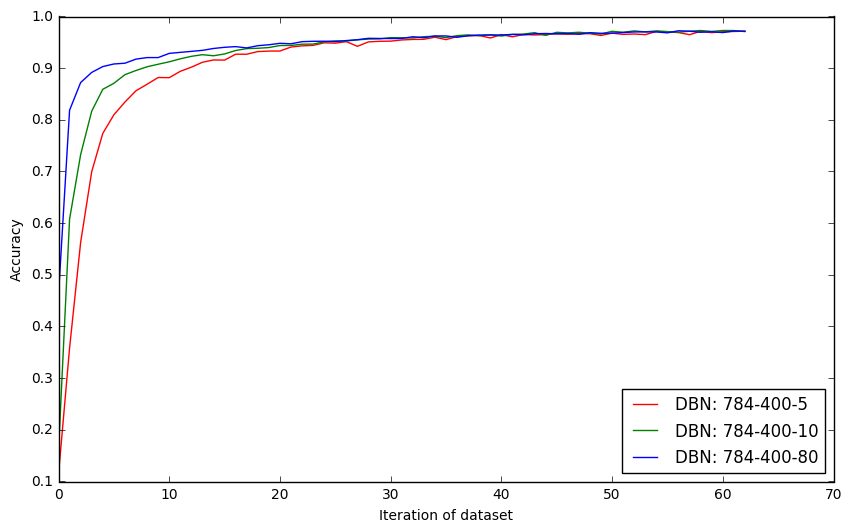

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_summary_3[:len(accuracy_summary_1)], 'r-', label='DBN: 784-400-5')
plt.plot(accuracy_summary_2[:len(accuracy_summary_1)], 'g-', label='DBN: 784-400-10')
plt.plot(accuracy_summary_1, 'b-', label='DBN: 784-400-80')
plt.xlabel('Iteration of dataset')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('dbn_accuracy.png')
plt.show()

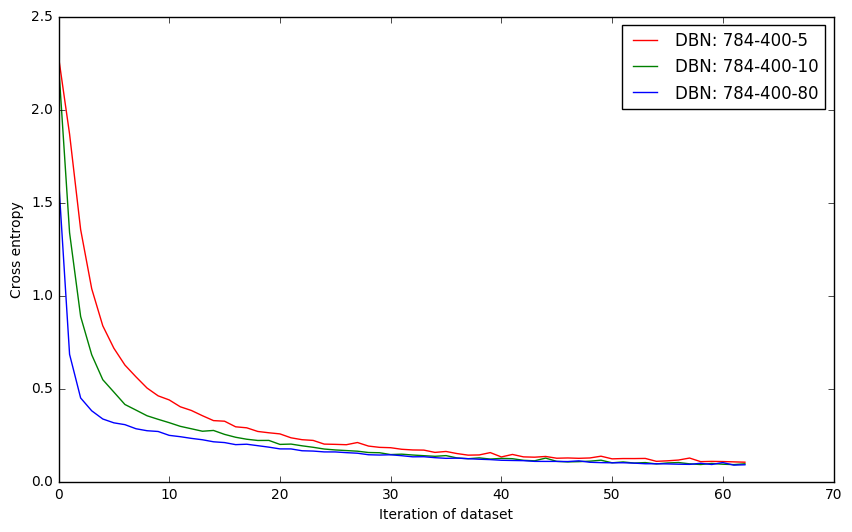

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(loss_summary_3[:len(accuracy_summary_1)], 'r-', label='DBN: 784-400-5')
plt.plot(loss_summary_2[:len(accuracy_summary_1)], 'g-', label='DBN: 784-400-10')
plt.plot(loss_summary_1, 'b-', label='DBN: 784-400-80')
plt.xlabel('Iteration of dataset')
plt.ylabel('Cross entropy')
plt.legend(loc='upper right')
plt.savefig('dbn_loss.png')
plt.show()